## IMPORTING LIBARARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORTING DATASET

In [2]:
df = pd.read_csv('Data_Train.csv') #IMPORTING DATASET

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## EXPLORATORY DATA ANALYSIS

In [5]:
df.isna().sum() #handling missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dropna(inplace=True) #droping null values

In [7]:
df.isna().sum() #

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.shape

(10682, 11)

In [9]:
df1 = df.filter(['Source'])
df1

,Source
0,Banglore
1,Kolkata
2,Delhi
3,Kolkata
4,Banglore
...,...
10678,Kolkata
10679,Kolkata
10680,Banglore
10681,Banglore


In [10]:
for col in df1:
    print(df1[col].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [11]:
df2 = df.filter(['Destination'])
df2

,Destination
0,New Delhi
1,Banglore
2,Cochin
3,Banglore
4,New Delhi
...,...
10678,Banglore
10679,Banglore
10680,Delhi
10681,New Delhi


In [12]:
for col in df2:
    print(df2[col].unique())

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [13]:
for col in df1:
    print(df1[col].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [14]:
# banglore, kolkata and delhi are common among the source and destination routes



In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Parsing

In [16]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])


In [17]:
#converting datatype of date and time columns from string into datetime format.  

for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)


In [19]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [20]:
df['journey_day'] = df['Date_of_Journey'].dt.day
df['journey_month'] = df['Date_of_Journey'].dt.month


In [21]:
df.drop('Date_of_Journey',axis = 1, inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-03-10 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-03-10 05:50:00,2022-03-10 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2022-03-10 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,2022-03-10 18:05:00,2022-03-10 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,2022-03-10 16:50:00,2022-03-10 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10682 non-null  datetime64[ns]
 5   Arrival_Time     10682 non-null  datetime64[ns]
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
 10  journey_day      10682 non-null  int64         
 11  journey_month    10682 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1.1+ MB


In [24]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)


In [25]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')
drop_column(df,'Dep_Time')

extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')
drop_column(df,'Arrival_Time')

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [27]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' '+ '0m'
        else:
             duration[i]='0h'+' ' + duration[i]


In [28]:
df['Duration']=duration

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [30]:
df.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h 0m,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10
10682,Air India,Delhi,Cochin,DEL ? GOI ? BOM ? COK,8h 20m,2 stops,No info,11753,5,9,10,55,19,15


In [31]:
df3 = df.filter(['Duration'])
df3

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [32]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [33]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(minute)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
drop_column(df,'Duration')

In [35]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [37]:
df['Duration_hours']=df['Duration_hours'].astype(int)
df['Duration_mins']=df['Duration_mins'].astype(int)
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

## FEATURE ENGINEERING

#### CATEGORICAL FEATURES

In [38]:
cat_col=[col for col in df.columns if df[col].dtype=='O']
cat_col


['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

#### NUMERICAL FEATURES

In [39]:
cont_col=[col for col in df.columns if df[col].dtype!='O']
cont_col


['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [40]:
categorical= df[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info


In [41]:
df.corr()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
Price,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
journey_day,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
journey_month,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
Dep_Time_hour,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_Time_minute,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_Time_hour,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_Time_minute,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.508778,-0.037964,0.055552,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.124855,-0.007708,-0.018597,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


In [42]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

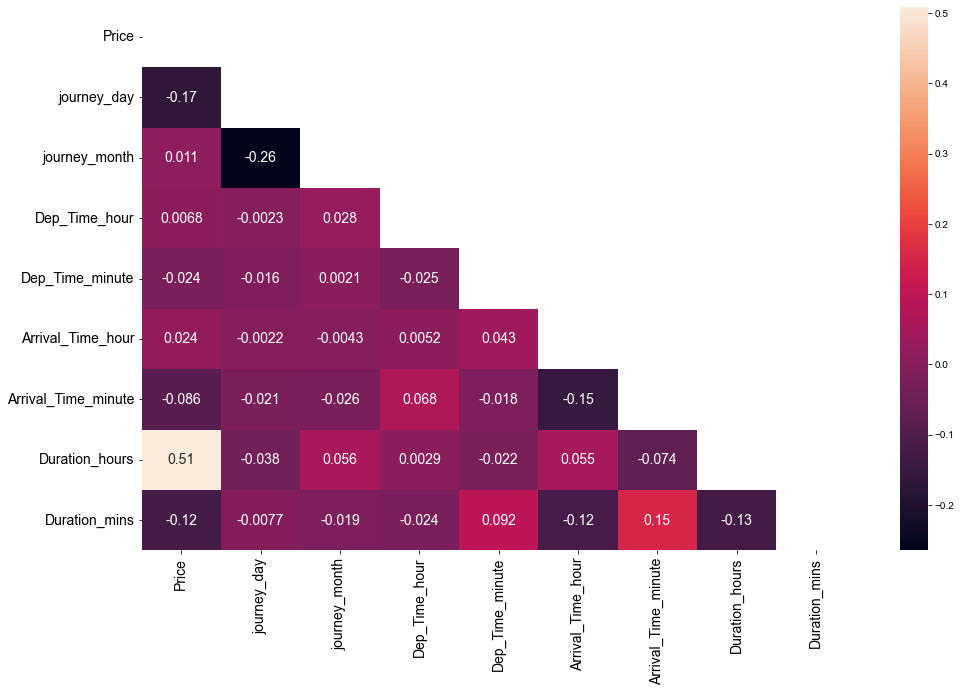

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),mask=mask,annot=True,annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [44]:
categorical['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

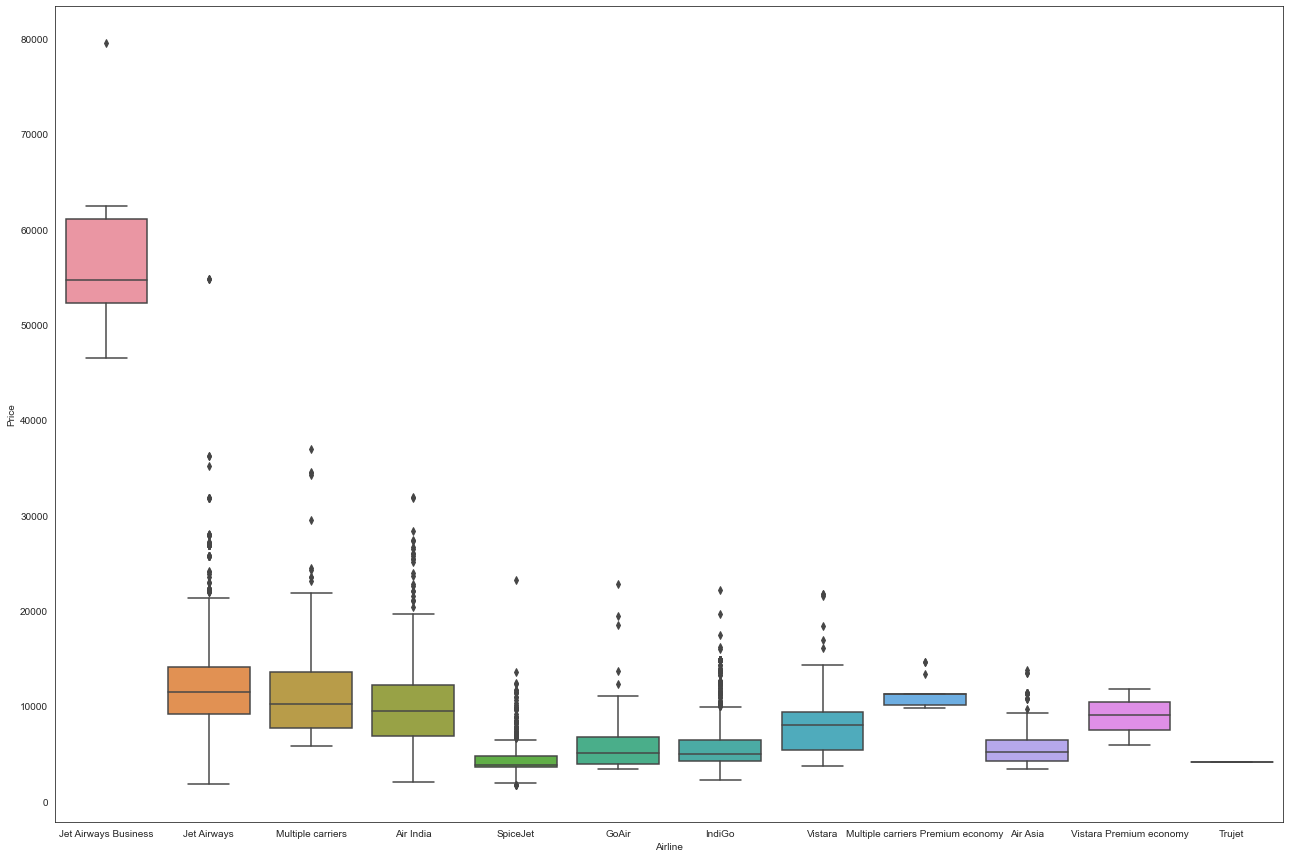

In [45]:
plt.figure(figsize=(22,15))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

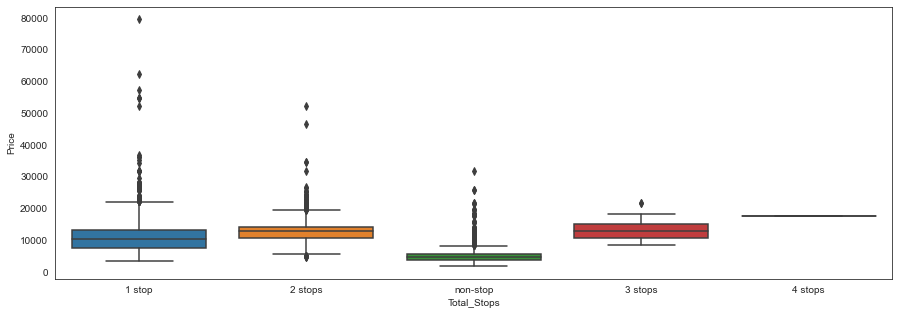

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))


### ENCODING

In [47]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
categorical['Source'].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

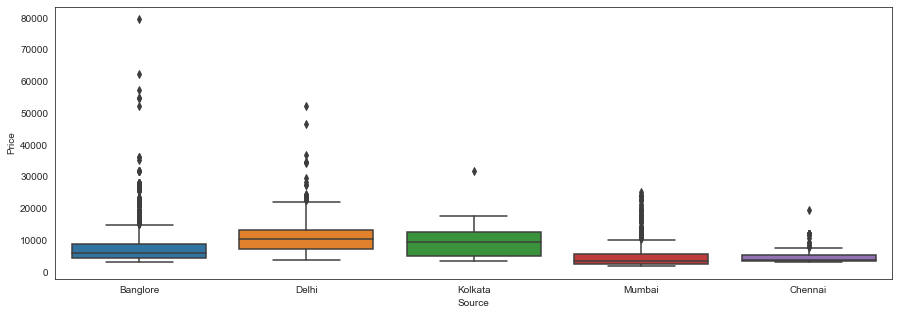

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False))

In [50]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

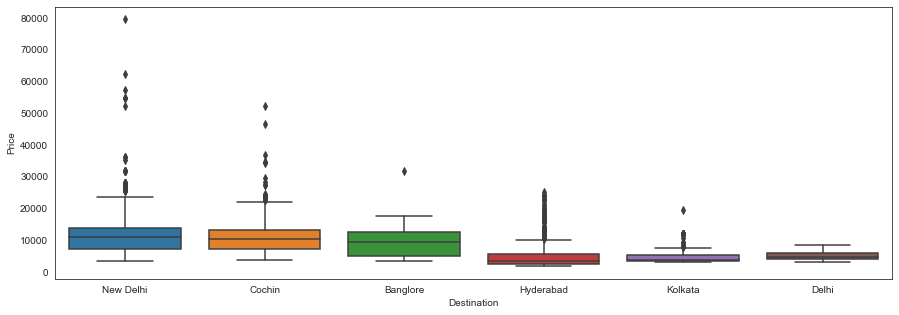

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))


In [53]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
df['Route'].unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

In [55]:
df['Route'].value_counts()

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64

In [56]:
categorical['Route_1']=categorical['Route'].str.split('?').str[0]

C:\Users\km\AppData\Local\Temp/ipykernel_15484/459994565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('?').str[0]


In [57]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR


In [58]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [59]:
categorical['Route_1']=categorical['Route'].str.split('?').str[0]
categorical['Route_2']=categorical['Route'].str.split('?').str[1]
categorical['Route_3']=categorical['Route'].str.split('?').str[2]
categorical['Route_4']=categorical['Route'].str.split('?').str[3]
categorical['Route_5']=categorical['Route'].str.split('?').str[4]
categorical['Route_6']=categorical['Route'].str.split('?').str[5]


C:\Users\km\AppData\Local\Temp/ipykernel_15484/2746956063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split('?').str[0]
C:\Users\km\AppData\Local\Temp/ipykernel_15484/2746956063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split('?').str[1]
C:\Users\km\AppData\Local\Temp/ipykernel_15484/2746956063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [60]:
categorical.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN,NaN
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN,NaN
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,BLR,BOM,DEL,NaN,NaN,NaN
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,BLR,BOM,DEL,NaN,NaN,NaN
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,BLR,BOM,DEL,NaN,NaN,NaN
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,DEL,BOM,COK,NaN,NaN,NaN


In [61]:
categorical['Route_6'].value_counts()

 DEL    1
Name: Route_6, dtype: int64

In [62]:
for i in ['Route_3', 'Route_4', 'Route_5', 'Route_6']:
    categorical[i].fillna('No_Route',inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [63]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Route_6            0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder


In [65]:
encoder=LabelEncoder()


In [66]:
categorical.columns


Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Route_6'],
      dtype='object')

In [67]:
# to convert Route feature into numerical format
for i in [ 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Route_6']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\km\AppData\Local\Temp/ipykernel_15484/3179491849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [68]:
categorical.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,0,34,8,13,5,1
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,2,5,29,13,5,1
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,0,7,8,13,5,1
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,0,7,8,13,5,1
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,0,7,8,13,5,1
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,3,7,6,13,5,1


In [69]:
drop_column(categorical, 'Route')


D:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5,1


In [71]:
categorical['Total_Stops'].unique()


array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [73]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\km\AppData\Local\Temp/ipykernel_15484/130354464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [74]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,1


In [75]:
data_train=pd.concat([categorical,Airline,Source,Destination,df[cont_col]],axis=1)

In [76]:
data_train.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,...,1,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,No info,2,5,29,13,5,...,0,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,0,7,8,13,5,...,1,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,No info,0,7,8,13,5,...,1,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,0,7,8,13,5,...,1,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,No info,3,7,6,13,5,...,0,8625,27,5,11,25,19,15,7,50


In [77]:
data_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [78]:
for i in ['Additional_Info']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\km\AppData\Local\Temp/ipykernel_15484/2421429078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [79]:
categorical.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,8,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2,8,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2,8,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1,8,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1,8,0,34,8,13,5,1
5,SpiceJet,Kolkata,Banglore,0,8,2,5,29,13,5,1
6,Jet Airways,Banglore,New Delhi,1,5,0,7,8,13,5,1
7,Jet Airways,Banglore,New Delhi,1,8,0,7,8,13,5,1
8,Jet Airways,Banglore,New Delhi,1,5,0,7,8,13,5,1
9,Multiple carriers,Delhi,Cochin,1,8,3,7,6,13,5,1


In [80]:
categorical['Additional_Info'].value_counts()

8    8344
5    1982
7     320
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: Additional_Info, dtype: int64

In [81]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [82]:
df.head(15)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,3,12,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,No info,22270,3,1,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,3,12,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


In [83]:
df.tail(15)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
10668,Jet Airways,Delhi,Cochin,DEL ? JDH ? BOM ? COK,2 stops,No info,21219,5,9,11,40,19,0,7,20
10669,Air India,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9929,15,6,8,0,19,15,11,15
10670,Air India,Kolkata,Banglore,CCU ? IXR ? DEL ? BLR,2 stops,No info,11411,5,12,5,50,23,15,17,25
10671,Air India,Mumbai,Hyderabad,BOM ? HYD,non-stop,No info,3100,6,6,21,5,22,25,1,20
10672,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,2 stops,In-flight meal not included,11150,27,6,23,5,19,0,19,55
10673,Jet Airways,Delhi,Cochin,DEL ? AMD ? BOM ? COK,2 stops,No info,16704,27,5,13,25,4,25,15,0
10674,Jet Airways,Banglore,New Delhi,BLR ? BOM ? DEL,1 stop,In-flight meal not included,11087,3,12,20,35,21,20,24,45
10675,Air India,Mumbai,Hyderabad,BOM ? HYD,non-stop,No info,3100,6,9,6,20,7,40,1,20
10676,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,9794,5,1,10,20,19,0,8,40
10677,SpiceJet,Banglore,Delhi,BLR ? DEL,non-stop,No check-in baggage included,3257,21,5,5,55,8,35,2,40


In [84]:
drop_column(data_train, 'Additional_Info')

In [85]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,1,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,1,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,1,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,1,...,1,13302,3,1,16,50,21,35,4,45


In [86]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [87]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Air India,GoAir,IndiGo,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,1,0,0,1,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,...,1,13302,3,1,16,50,21,35,4,45


In [88]:
pd.set_option('display.max_columns',36)
data_train.head()


,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [89]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


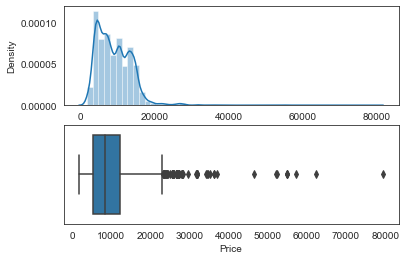

In [90]:
plot(data_train,'Price')

In [91]:
data_train['Price'].median()

8372.0

In [92]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


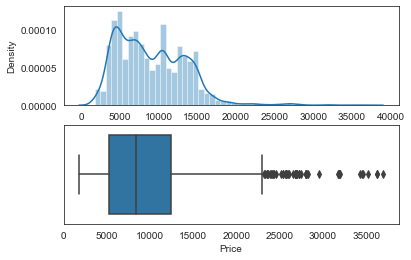

In [93]:
plot(data_train,'Price')

In [94]:
X=data_train.drop('Price',axis=1)
X.head()


,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [95]:
X.shape

(10682, 35)

In [96]:
Y=data_train['Price']
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

## Feature Selection

In [97]:
from sklearn.feature_selection import mutual_info_classif


In [98]:
mutual_info_classif(X,Y)
imp=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Total_Stops,2.141939
Route_1,2.028777
Route_2,2.773341
Route_3,2.315064
Route_4,1.482810
Route_5,0.717807
Route_6,1.814568
Air India,0.759125
GoAir,0.091684
IndiGo,0.678641


In [99]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.773341
Route_3,2.315064
Total_Stops,2.141939
Route_1,2.028777
Arrival_Time_hour,1.841516
Route_6,1.814568
Duration_hours,1.793988
Arrival_Time_minute,1.540710
Delhi,1.537287
Cochin,1.520908


In [100]:
from sklearn.model_selection import train_test_split


In [101]:
#splitting data into 80% training and 20% testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=100)

In [102]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    Model=ml_model.fit(X_train,Y_train)
    print('Training score: {}'.format(Model.score(X_train,Y_train)))
    Predictions=Model.predict(X_test)
    print('Predictions are: {}'.format(Predictions))
    print('\n')
    R2_score=metrics.r2_score(Y_test,Predictions)
    print('R2 score is {}'.format(R2_score))
    print('MAE:',metrics.mean_absolute_error(Y_test,Predictions))
    print('MSE:',metrics.mean_squared_error(Y_test,Predictions))
    print('RMSE:',np.sqrt(metrics.mean_absolute_error(Y_test,Predictions)))
    sns.distplot(Y_test-Predictions)
    
    if dump==1:
        with open('Flight_Price_Prediction.pickle','wb') as file:
            pickle.dump(Model, file)

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score: 0.9545747901783913
Predictions are: [ 8884.39        9052.97142857 12610.79966667 ... 13980.60759524
 11410.59       14729.87      ]


R2 score is 0.8133978935857628
MAE: 1161.3098946183543
MSE: 3469143.567770531
RMSE: 34.07799722135024


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


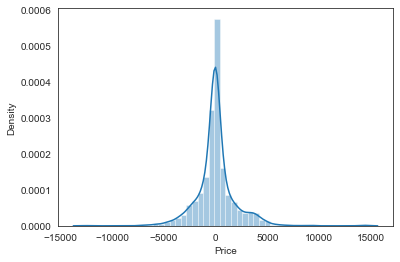

In [104]:
predict(RandomForestRegressor(),1)

Training score: 0.6139937728380742
Predictions are: [ 7657.13110598 11311.78645255 14078.37086506 ... 10858.5450028
 14173.32971118 11342.00238972]


R2 score is 0.6214823794712256
MAE: 1937.0186965362864
MSE: 7037069.376002584
RMSE: 44.011574574608055


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


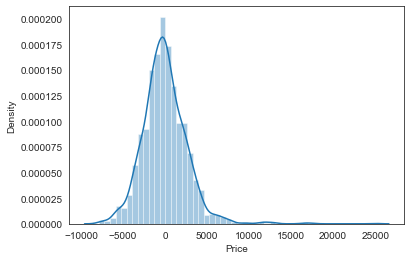

In [105]:
predict(LinearRegression(),0)

Training score: 0.778100683152205
Predictions are: [ 9245.  12782.4 13871.2 ... 12063.2 12179.  15667.8]


R2 score is 0.6704028356872792
MAE: 1656.778568086102
MSE: 6127582.933027609
RMSE: 40.703544908104774


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


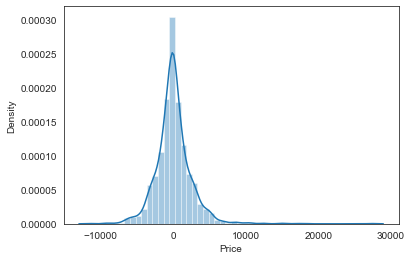

In [106]:
predict(KNeighborsRegressor(),0)


Training score: 0.9685232133131106
Predictions are: [11410.  7408. 12819. ... 12898. 11087. 15237.]


R2 score is 0.7142650728125153
MAE: 1328.2397831851504
MSE: 5312134.486517314
RMSE: 36.44502412106693


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


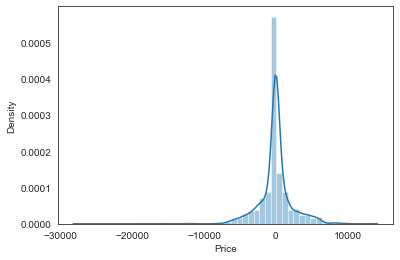

In [107]:
predict(DecisionTreeRegressor(),0)


In [108]:
reg_rf= RandomForestRegressor()


In [109]:
from sklearn.model_selection import RandomizedSearchCV


In [110]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]

In [111]:
random_grid={
    'n_estimators': n_estimators,
    'max_features': ['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]}


In [112]:
random_grid


{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [113]:
rf_random=RandomizedSearchCV(estimator= reg_rf, param_distributions= random_grid, cv=3, verbose=2, n_jobs=-1)


In [114]:
rf_random.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 760,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [116]:
prediction=rf_random.predict(X_test)

In [117]:
prediction.reshape(-1)

array([ 8885.52644841,  9770.19494005, 12515.08482451, ...,
       13978.73746805, 11388.01536811, 14886.36344965])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

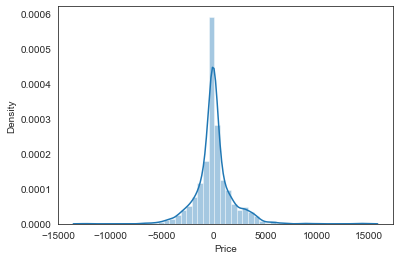

In [118]:
sns.distplot(Y_test-prediction)

In [119]:
metrics.r2_score(Y_test,prediction)

0.8295986008135576

In [120]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)

val_score = pd.DataFrame(cross_val_score(RandomForestRegressor(), X, Y, cv=cv), columns=['Validation Score'])


In [121]:
val_score

,Validation Score
0,0.813055
1,0.825505
2,0.807044
3,0.829430
4,0.835406


In [122]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))